In [7]:
import numpy as np
import PIL
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import image

%matplotlib inline

## 1. Load sample image

JPEG
RGB
(640, 374)


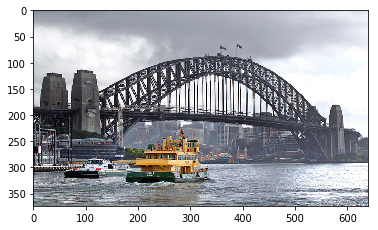

In [6]:
with open("sydney_bridge.jpg", "rb") as fp:
    image = Image.open(fp)
    print(image.format)
    print(image.mode)
    print(image.size)
    plt.imshow(image)
    plt.show()

## 2. Normalize pixel values

Normalize pixel values so that each pixel value is in the range of 0 to 1.

Neural networks slow down training if the provided input values are large.

In [19]:
with open("sydney_bridge.jpg", "rb") as fp:
    image = Image.open(fp)
    pixels = np.asarray(image)
    print("Data shape: {}".format(pixels.shape))
    print("Data type: {}".format(pixels.dtype))
    print("Min: {:.3f} Max: {:.3f}".format(pixels.min(), pixels.max()))
    pixels = pixels.astype("float32")
    pixels /= 255.0
    print("Min: {:.3f} Max: {:.3f}".format(pixels.min(), pixels.max()))

Data shape: (374, 640, 3)
Data type: uint8
Min: 0.000 Max: 255.000
Min: 0.000 Max: 1.000


## 3. Centering pixel values

Subtract mean from pixel values

Centering can be performed __before or after normalization__

__Centering before normalization:__
    Pixel values centered close to 0.5 and range 0-1

__Centering after normalization:__
    pixel values will have both positive and negative values but will not render correctly

Mean pixel value calculated before subtracting it from pixel values

How to calculate means?
* Per image

* Per mini-batch of images

* Per training dataset

__Global Centering__
Calculating and subtracting mean pixel value across all colour channels

__Local Centering__
Calculating and subtracting mean pixel value per colour channel


## Global Centering

In [22]:
with open("sydney_bridge.jpg", "rb") as fp:
    image = Image.open(fp)
    pixels = np.asarray(image)
    pixels = pixels.astype("float32")
    
    mean = pixels.mean()
    print("Mean: {:.3f}".format(mean))
    print("Min: {:.3f} Max: {:.3f}".format(pixels.min(), pixels.max()))
    
    pixels -= mean
    mean = pixels.mean()
    print("Mean: {:.3f}".format(mean))
    print("Min: {:.3f} Max: {:.3f}".format(pixels.min(), pixels.max()))

Mean: 152.149
Min: 0.000 Max: 255.000
Mean: -0.000
Min: -152.149 Max: 102.851


## Local Centering

In [28]:
with open("sydney_bridge.jpg", "rb") as fp:
    image = Image.open(fp)
    pixels = np.asarray(image)
    pixels = pixels.astype("float32")
    
    # Calculate per channel means and standard deviations
    means = pixels.mean(axis=(0,1), dtype="float64")
    print("Means: {}".format(means))
    print("Mins: {} Maxs: {}".format(pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
    
    # Per-channel centering of means
    pixels -= means
    means = pixels.mean(axis=(0,1), dtype="float64")
    print("Means: {}".format(means))
    print("Mins: {} Maxs: {}".format(pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
    

Means: [148.61581718 150.64154412 157.18977691]
Mins: [0. 0. 0.] Maxs: [255. 255. 255.]
Means: [1.14413078e-06 1.61369515e-06 1.37722619e-06]
Mins: [-148.61581 -150.64154 -157.18977] Maxs: [106.384186 104.35846   97.81023 ]


## Standardization

Center pixel values to be mean 0 and normalizing pixel values by standard deviation

Set pixel values to be mean 0.0 and standard deviation of 1.0

## Global Standardization

In [30]:
with open("sydney_bridge.jpg", "rb") as fp:
    image = Image.open(fp)
    pixels = np.asarray(image)
    pixels = pixels.astype("float32")
    
    mean, std = pixels.mean(), pixels.std()
    print("Mean: {:.3f}, Std Dev: {:.3f}".format(mean, std))
    
    # global standardization of pixels
    pixels = (pixels - mean) / std
    mean, std = pixels.mean(), pixels.std()
    print("Mean: {:.3f}, Std Dev: {:.3f}".format(mean, std))

Mean: 152.149, Std Dev: 70.642
Mean: -0.000, Std Dev: 1.000


# Positive Global Standardization

Same as above but scales the pixel values to be in range [0,1]

In [31]:
with open("sydney_bridge.jpg", "rb") as fp:
    image = Image.open(fp)
    pixels = np.asarray(image)
    pixels = pixels.astype("float32")
    
    mean, std = pixels.mean(), pixels.std()
    print("Mean: {:.3f}, Std Dev: {:.3f}".format(mean, std))
    
    # global standardization of pixels
    pixels = (pixels - mean) / std
    
    # clip pixel values to [-1, 1]
    pixels = np.clip(pixels, -1.0, 1.0)
    
    # rescale from [-1,1] to [0,1] with 0.5 mean
    pixels = (pixels + 1.0) / 2.0
    mean, std = pixels.mean(), pixels.std()
    print("Mean: {:.3f}, Std Dev: {:.3f}".format(mean, std))
    print("Min: {:.3f}, Max: {:.3f}".format(pixels.min(), pixels.max()))
    

Mean: 152.149, Std Dev: 70.642
Mean: 0.510, Std Dev: 0.388
Min: 0.000, Max: 1.000


## Local Standardization

In [33]:
with open("sydney_bridge.jpg", "rb") as fp:
    image = Image.open(fp)
    pixels = np.asarray(image)
    pixels = pixels.astype("float32")
    
    # calculate per-channel means and std devs
    means = pixels.mean(axis=(0,1), dtype="float64")
    stds = pixels.std(axis=(0,1), dtype="float64")
    print("Means: {}, Stds: {}".format(means, stds))
    
    # per channel standardization
    pixels = (pixels - means) / stds
    means = pixels.mean(axis=(0,1), dtype="float64")
    stds = pixels.std(axis=(0,1), dtype="float64")
    print("Means: {}, Stds: {}".format(means, stds))

Means: [148.61581718 150.64154412 157.18977691], Stds: [70.21666738 70.6718887  70.75185228]
Means: [ 6.26286458e-14 -4.40909176e-14 -8.38046276e-13], Stds: [1. 1. 1.]


## Extensions

* Develop a function to scale a provided image, using arguments to choose type of preparation to perform

* Projection methods - Investigate and implement data preparation methods that remove linear correlations from pixel data, i.e. PCA, ZCA

* Dataset Statistics - Select and update one of the centering or standardization examples to calculate statistics across an entire training dataset, then apply those statistics when preparing image data for training or inference.